AUC: 0.9273726851851852
Accuracy: 0.8813559322033898
Sensitivity: 0.90625
Specificity: 0.8518518518518519
PPV: 0.8787878787878788
NPV: 0.8846153846153846
F1 Score: 0.8923076923076924


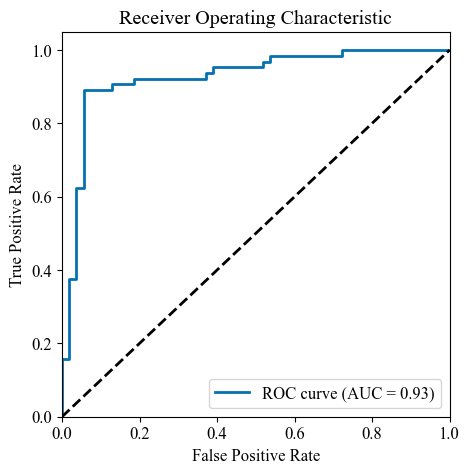

In [4]:
import pandas as pd
from joblib import load
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score, recall_score, precision_score, confusion_matrix, f1_score
)
import matplotlib.pyplot as plt

# Set Times New Roman font
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Load the Random Forest model
model_rf = load('final_model_rf.joblib')

# Read the Shandong.xlsx file
df_shandong = pd.read_excel('Shandong.xlsx')

# Separate features and label
X_shandong = df_shandong.iloc[:, :-1]
y_shandong = df_shandong.iloc[:, -1]

# Use the model to make predictions
y_pred_shandong = model_rf.predict(X_shandong)
y_pred_proba_shandong = model_rf.predict_proba(X_shandong)[:, 1]

# Calculate and print the performance metrics
accuracy = accuracy_score(y_shandong, y_pred_shandong)
sensitivity = recall_score(y_shandong, y_pred_shandong)
precision = precision_score(y_shandong, y_pred_shandong)
f1 = f1_score(y_shandong, y_pred_shandong)
roc_auc = roc_auc_score(y_shandong, y_pred_proba_shandong)

# Calculate Specificity, PPV, and NPV
tn, fp, fn, tp = confusion_matrix(y_shandong, y_pred_shandong).ravel()
specificity = tn / (tn + fp)
ppv = tp / (tp + fp)
npv = tn / (tn + fn)

# Print performance metrics
print(f'AUC: {roc_auc}')
print(f'Accuracy: {accuracy}')
print(f'Sensitivity: {sensitivity}')
print(f'Specificity: {specificity}')
print(f'PPV: {ppv}')
print(f'NPV: {npv}')
print(f'F1 Score: {f1}')

# Draw the ROC curve, reducing the figure size
fpr, tpr, _ = roc_curve(y_shandong, y_pred_proba_shandong)  # Calculate FPR and TPR for ROC

plt.figure(figsize=(5, 5))  # Smaller figure size
plt.plot(fpr, tpr, color='#0571b0', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')  # Black dashed diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

plt.savefig('Fig3B.pdf', bbox_inches='tight')

plt.show()